In [3]:
import numpy as np
import random
import itertools
import math
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile,Aer,execute
from qiskit_aer import AerSimulator,qasm_simulator
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import DensityMatrix, partial_trace,random_statevector

def get_cyclic_permutation(permutation):
    '''
    input: arbitary permutation of tokens in complete graph:list
    output: cyclic permutation equivalent of the input:list of lists
    '''
    pi=permutation
    cyclic_permutation=[]
    n=len(pi)
    not_in_cycle=list(range(n))
    while len(not_in_cycle)!=0:
        cycle=[]
        start=not_in_cycle[0]
        current=start
        cycle.append(start)
        not_in_cycle.remove(start)
        final=-1
        while final != start:
            current=permutation[current]
            cycle.append(current)
            if(current in not_in_cycle):
                not_in_cycle.remove(current)
            final=current
        cyclic_permutation.append(cycle)
    cyclic=[]
    for i in cyclic_permutation:
        length=len(i)
        if(length>2):
            cyclic.append(i[:-1])
    return(cyclic)
def Get_Routing_via_matching(cyclic_permutation):
    '''
    input:cyclic permutations: list of lists
    output: 2 step swaps that is equivalent to routing via matching 2 list of list(list of swaps)
    '''
    layer_1=[]
    layer_2=[]
    for cycle in  cyclic_permutation:
        length=len(cycle)
        for j in range(int(len(cycle)/2)):
            layer_1.append([cycle[j],cycle[length-j-1]])
            if(cycle[j+1]!=cycle[length-j-1]):
                layer_2.append([cycle[j+1],cycle[length-j-1]])
    return(layer_1,layer_2)

def old_causaly_cover_nodes(M,i,j):##edges=M
    '''
    input: M=random matching for the complete graph
           i=initial node n>=i,j>=0 int
           j=final node 
    output:boolean:true: iand j are causaly cover
                   false: i and j are not causaly covered
    '''
    path=[i]
    cover=False
    for matching in M: ##if you think about it M is nothing but random matching in our complete graph
        for i in matching:
            current=path[-1]
            if(i[0]==current):
                path.append(i[1])
                if(i[1]==j):
                    cover=True
                break
            elif(i[1]==current):
                path.append(i[0])
                if(i[0]==j):
                    cover=True
                break
        if(cover==True):
            # print("path for causaly cover=",path)
            return cover
    return cover
def causaly_cover_nodes(M,i,j):##edges=M
    '''
    input: M=random matching for the complete graph
           i=initial node n>=i,j>=0 int
           j=final node 
    output:boolean:true: iand j are causaly cover
                   false: i and j are not causaly covered
    '''
    covered_set=[i]
    cover=False
    for matching in M: ##if you think about it M is nothing but random matching in our complete graph
        for k in matching:
            new_covered=[]
            for l in covered_set:
                current=l
                if(k[0]==current):
                    new_covered.append(k[1])
                    if(k[1]==j):
                        cover=True
                        break
                elif(k[1]==current):
                    new_covered.append(k[0])
                    if(k[0]==j):
                        cover=True
                        break
            covered_set=covered_set+new_covered
            if(cover==True):
                # print("path for causaly cover=",path)
                return cover
    return cover

def causaly_cover_graph(M,n):
    nodes=list(range(n))
    ##get all the possible pair combination for nodes:
    permutation=list(itertools.permutations(nodes,2))
    for pairs in permutation:
        is_causaly_cover=causaly_cover_nodes(M,pairs[0],pairs[1])
        if(is_causaly_cover== False):
            return(False,pairs)
    return(True,(-1,-1))
def create_M(pi):
    ''' 
    input: random/ arbitary permutations
    output:return all the matching generated for this permutations using 2 step routing algorithm
    '''
    ##pass all these permutation to get two step routing 
    M=[]
    for i in range(len(pi)):
        cyclic_permutation=get_cyclic_permutation(pi[i])
        O,E=Get_Routing_via_matching(cyclic_permutation)
        M.append(O)
        M.append(E)
    return M
# permutation=random.sample(list(range(5)),5)
# print("permutation=",permutation)
# cyclic_permutation=get_cyclic_permutation(permutation)
# print("cyclic permutations=",cyclic_permutation)
# O,E=Get_Routing_via_matching(cyclic_permutation)
# print("two step routing",O,E)

### trying to see how many random permutation is required to make a graph causally covered

In [71]:
random_permutation_needed=[]
nodes_trial=[3,5,9,17,65,129,257.300]
for n in nodes_trial: ## for different graphs of n nodes
    print(n)
    nodes=list(range(n))
    pi=[]
    for k in range(1,100): ## create k different permutations
        ##create K-different random permutations 
        pi.append(random.sample(nodes,n))
        M=create_M(pi)
        is_causaly_cover,pairs=causaly_cover_graph(M,n)
        print(is_causaly_cover)
        if(is_causaly_cover==True):
            random_permutation_needed.append(k)
            break
    if(is_causaly_cover==False):
        random_permutation_needed.append(-1)
print(random_permutation_needed)

# n=5
# k=1
# pi=[]
# nodes=list(range(n))
# #create K-different random permutations 
# for i in range(k):
#     pi.append(random.sample(nodes,n))
# print("permutation=",pi)
# M=create_M(pi)
# print("M=",M)
# is_causaly_cover,pairs=causaly_cover_graph(M,n)
# if(is_causaly_cover==False):
#     print("these pairs are not causaly covered=",pairs)
#     print("M",M)
# print("is coudaly cover=",is_causaly_cover)



3
False
True
5
False
False
True
9
False
False
False
True
17
False
False
False
False
True
65
False
False
False
False
False
True
129
False
False
False
False
False
True
257.3


TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
## trying to implement the above algorithm using dynamic programming. still have not figured out.
# n=5
# pi=[]
# pi.append(random.sample(list(range(n)),n))
# M=[]
# current_M=create_M([pi[-1]]) # trying one at a time so that it takes less time
# M=M+current_M
# causaly_cover=False
# dynamic_table=[]
# for i in range(n):
#     row=[]
#     for j in range(n):
#         row.append([])
#     dynamic_table.append([])

# while causaly_cover==False:
#     for match in current_M:
#         for swaps in match:
#             dynamic_table[swaps[0]][swaps[1]]=True
        
            

# while causaly_cover==False:



[[[0, 2], [4, 3]], [[4, 2]]]


Text(0, 0.5, 'random permutation required')

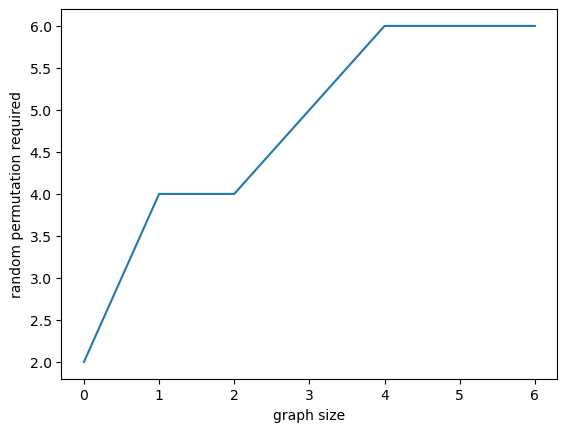

In [64]:
plt.plot(list(range(len(nodes_trial))),random_permutation_needed)

plt.xlabel("graph size")
plt.ylabel('random permutation required')

### Now use this method to create a WD distribution in quantum circuit. see if O(log(n)) depth is suffiecient for creating WD distribution or not. 

In [65]:
##all the functions
def initialize_R_product_state(q,n):
    for i in range(n):
        q.initialize(random_statevector(2).data,i)
    return(q)
def random_clifford(qc,n):
    qubits_list=list(range(n))
    for i in range(500):
        choice=random.choices(['s','h','cnot','i'])[0]
        qbit=random.choices(qubits_list)[0]
        if choice=='s':
            qc.s(qbit)
        elif choice=='h':
            qc.h(qbit)
        elif choice=='i':
            qc.i(qbit)
        elif choice=='cnot':
            c=qubits_list.copy()
            c.remove(qbit)
            control_bit=random.choices(c)[0]
            order=[control_bit,qbit]
            random.shuffle([control_bit,qbit]) ## randomize the cont order
            qc.cnot(order[0],order[1])
    return qc
def random_clifford_with_depth(qc,n,depth):
    qubits_list=list(range(n))
    un_used_qubits=qubits_list.copy()
    while len(un_used_qubits)>=1:
        qbit=random.choice(un_used_qubits)
        choice=random.choices(['s','h','cnot'])[0]
        un_used_qubits.remove(qbit)
        if choice=='s':
            qc.s(qbit)
        elif choice=='h':
            qc.h(qbit)
        elif choice=='cnot':
            if(un_used_qubits!=[]):
                control_bit=random.choices(un_used_qubits)[0]
                order=[control_bit,qbit]
                random.shuffle(order)
                qc.cnot(order[0],order[1])

    return qc
def random_Cnot_permutation(qc,n):
    pi=[]
    nodes=list(range(n))
    for i in range(int(math.log(n,2))):
        pi.append(list(random.sample(nodes,n)))
    M=create_M(pi)
    ## now add the cnot gate layers according to the matching. 
    for i in M:
        for cnots in i:
            qc.cnot(cnots[0],cnots[1])
        ## after each layer of cnots add random S,H gates to all other qubits
        for i in range(n):
            choice=random.choices(['s','h','i'])[0]
            if choice=='s':
                qc.s(i)
            elif choice=='h':
                qc.h(i)
            elif choice=='i':
                qc.i(i)
    return qc
def get_r_tildae(qc):
    rho= DensityMatrix.from_instruction(qc) ##get the state vector of the system
    # print(state)
    rho_a=partial_trace(state=rho,qargs=list(range(int(n/2))))  ##rho_a is the reduced density matrix for the first a subsystem A(as the paper has divided the whole system into A and B subsystem)
    eigenvalues=np.linalg.eigvals(rho_a.data) ##entanglement spectrum is the set of the eigen values of the reduced density matrix
    ES=sorted(eigenvalues,reverse=True)
    ES_real=[i.real for i in ES ]
    lambd=ES_real
    r_k_tilda=[]
    for i in range(1,len(lambd)-1):
        del_k=lambd[i-1]-lambd[i]
        del_k_P1=lambd[i]-lambd[i+1]
        r_k_tilda.append(min(del_k,del_k_P1)/max(del_k,del_k_P1))
    r_mean=np.mean(r_k_tilda)
    return r_mean
def brick_1D_add_4_layer(qc,n): 
    layer=0
    for i in range(0,n,2):
        pair=[i,i+1]
        random.shuffle(pair)
        qc.cnot(pair[0],pair[1])
    for i in range(n):
        choice=random.choices(['s','h','i'])[0]
        if choice=='s':
            qc.s(i)
        elif choice=='h':
            qc.h(i)
        elif choice=='i':
            qc.i(i)
    for i in range(1,n-1,2):
        pair=[i,i+1]
        random.shuffle(pair)
        qc.cnot(pair[0],pair[1])
    # qc.cnot(0,n-1)
    for i in range(n):
        choice=random.choices(['s','h','i'])[0]
        if choice=='s':
            qc.s(i)
        elif choice=='h':
            qc.h(i)
        elif choice=='i':
            qc.i(i)
    return qc


In [62]:
n=10
depths=[8,16,24,32,40,48,56,64,72,80]

trials=4

base=QuantumCircuit(n)
base=initialize_R_product_state(base,n)
base=random_clifford(base,n)

# qc_ours.draw()
choice=random.choice(list(range(n)))
# qc_ours.t(choice)
for i in range(n):
    base.t(i)
qc_theirs=base.copy() ## same initial circuit
qc_ours=base.copy()
r_tildae_ours=[]
r_tildae_each_trial=[]
for t in range(trials):
    qc_theirs=qc_ours.copy() ## same initial circuit
    qc_ours=random_Cnot_permutation(qc_ours,n)
    r_tildae_ours.append(get_r_tildae(qc_ours))
    r_tildae_different_depths=[]
    for depth in depths:
        qc_theirs=brick_1D_add_4_layer(qc_theirs.copy(),n)
        qc_theirs=brick_1D_add_4_layer(qc_theirs.copy(),n)

        r_tildae_theirs=get_r_tildae(qc_theirs)
        r_tildae_different_depths.append(r_tildae_theirs)
    r_tildae_each_trial.append(r_tildae_different_depths)
    

In [63]:
print(len(r_tildae_each_trial))
x=[i[0] for i in r_tildae_each_trial]
print(np.mean(x))

4
0.555854379322614


[0.555854379322614, 0.5974774048411984, 0.5512250381550144, 0.550626563049183, 0.586384117926245, 0.5744822972840536, 0.597479807586671, 0.6387799920156868, 0.5558413846477466, 0.5567792954871876]


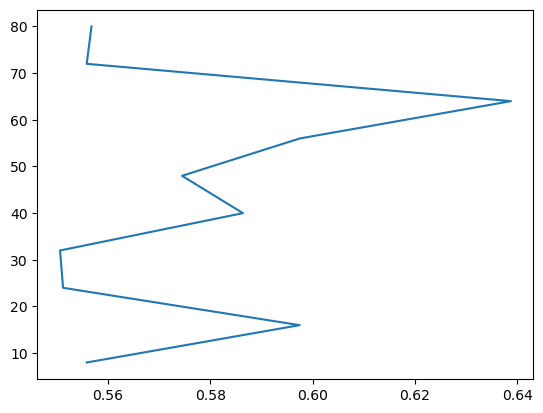

In [64]:
## for computing the mean of trials for each depth
mean_r_tildae_theirs=[]
for j in range(len(depths)):
    each_depth_temp=[]
    for t in range(trials):
        each_depth_temp.append(r_tildae_each_trial[t][j])
    mean_r_tildae_theirs.append(np.mean(each_depth_temp))
print(mean_r_tildae_theirs)
plt.plot(mean_r_tildae_theirs,depths)

In [32]:
# plt.plot(r_tildae_different_depths)
np.mean(r_tildae_different_depths[i*8:i*8+trials])

0.5150204873856357

In [33]:
qc=QuantumCircuit(2)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(0)
qc.cnot(0,1)
rho=DensityMatrix(qc)
print("density matrix=",rho)
rho_a=partial_trace(state=rho,qargs=[1]) ##rho_a is the reduced density matrix for the first a subsystem A(as the paper has divided the whole system into A and B subsystem)
print('reduced density matrix=',rho_a)
eigenvalues=np.linalg.eigvals(rho_a.data) ##entanglement spectrum is the set of the eigen values of the reduced density matrix
ES=sorted(eigenvalues,reverse=True)
print(ES)
ES_real=[i.real for i in ES ]
lambd=ES_real
r_k_tilda=[]
for i in range(1,len(lambd)-1):
    del_k=lambd[i-1]-lambd[i]
    del_k_P1=lambd[i]-lambd[i+1]
    r_k_tilda.append(min(del_k,del_k_P1)/max(del_k,del_k_P1))
r_mean=np.mean(r_k_tilda)
print(r_mean)


density matrix= DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))
reduced density matrix= DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))
[(0.4999999999999999+0j), (0.4999999999999999+0j)]
nan


/Users/111asim/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/111asim/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
